# This time: try grouping all news feed together into one value.

In [1]:
path = "Resources/Valve_Player_Data.csv"

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from pprint import pprint
import time
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
monthly_players = pd.read_csv(path)
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [3]:
monthly_players.nunique()

Month_Year       111
Avg_players     5241
Gain            5135
Percent_Gain    3685
Peak_Players    4988
URL               98
Date             111
Game_Name         98
dtype: int64

In [4]:
monthly_players.dtypes

Month_Year       object
Avg_players     float64
Gain            float64
Percent_Gain     object
Peak_Players      int64
URL              object
Date             object
Game_Name        object
dtype: object

In [5]:
# EXTRACT AND TRANSFORM DATA

# drop first two months for every game as these extreme values will totally skew the data.

In [6]:
monthly_players.Game_Name.unique()

array(['Counter Strike: Global Offensive', 'Dota 2',
       'PUBG: Battlegrounds', 'Apex Legends', 'Team Fortress 2',
       'Grand Theft Auto V', 'NARAKA: BLADEPOINT', 'Wallpaper Engine',
       'Rust', 'Destiny 2', 'Warframe', 'Cookie Clicker',
       "Tom Clancy's Rainbow Six Seige", 'Football Manager 2021 ',
       'PAYDAY 2', 'ARK: Survival Evolved', 'Dead by Daylight',
       "Sid Meier's Civilization VI", 'MIR4', 'Unturned', 'Terraria',
       'War Thunder', 'Hearts of Iron IV', 'Battlefield V', 'Valheim',
       'World of Tanks Blitz', 'Dayz', 'Total War: WARHAMMER II',
       "Don't Starve Together", 'Euro Truck Simulator 2', 'Rocket League',
       "Garry's Mod", 'Monster Hunter: World', 'Stardew Valley',
       'FINAL FANTASY XIV Online', 'Bless Unleashed ',
       'The Witcher 3: Wild Hunt', '雀魂麻将(MahjongSoul)', 'RimWorld',
       'Red Dead Redemption 2', '7 Days to Die', 'Black Desert',
       'Cities: Skylines', "Sid Meier's Civilization V",
       'Farming Simulator 19',

In [7]:
ID_list = monthly_players.URL.unique()

In [8]:
for i in range(0,len(ID_list)):
    ID_list[i] = ID_list[i].replace('https://steamcharts.com/app/', '')
ID_list

array(['730', '570', '578080', '1172470', '440', '271590', '1203220',
       '431960', '252490', '1085660', '230410', '1454400', '359550',
       '1263850', '218620', '346110', '381210', '289070', '1623660',
       '304930', '105600', '236390', '394360', '1238810', '892970',
       '444200', '221100', '594570', '322330', '227300', '252950', '4000',
       '582010', '413150', '39210', '1254120', '292030', '1329410',
       '294100', '1174180', '251570', '582660', '255710', '8930',
       '787860', '489830', '281990', '306130', '550', '1293830', '236850',
       '480', '813780', '1184370', '601510', '250900', '513710', '377160',
       '427520', '261550', '1281930', '1644960', '960090', '291550',
       '438100', '1097150', '107410', '1100600', '552990', '1313860',
       '374320', '1158310', '835570', '275850', '1259970', '1172620',
       '10', '740130', '238960', '629520', '1091500', '1129580',
       '1222680', '739630', '1225330', '1049590', '453480', '594650',
       '526870', '322

In [9]:
# Strip the URL data off the app ID
url_list = monthly_players["URL"]
for i in range(0,len(url_list)):
    url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')

C:\Users\David\AppData\Local\Temp/ipykernel_1360/1115660068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')


In [10]:
monthly_players = monthly_players.rename(columns={"URL": "APP"})
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,APP,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,435150,2016-09-01,Divinity: Original Sin 2


In [11]:
# split dataframe into relational dataframes
games = monthly_players[["APP", "Game_Name"]]
games = games.drop_duplicates().set_index("APP")
games

,Game_Name
APP,
730,Counter Strike: Global Offensive
570,Dota 2
578080,PUBG: Battlegrounds
1172470,Apex Legends
440,Team Fortress 2
...,...
1238840,Battlefield 1
239140,Dying Light
646570,Slay the Spire


In [12]:
reduced_players = monthly_players[["Percent_Gain", "APP", "Date"]]
reduced_players

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
5266,-10.24%,435150,2016-12-01
5267,-38.63%,435150,2016-11-01
5268,-36.66%,435150,2016-10-01
5269,+7654.89%,435150,2016-09-01


## Remove bad rows

In [13]:
# Drop games with 1 or 2 rows; this is not enough data to extrapolate from, 
# as we will need to drop the first two months of a game's existence
game_id = reduced_players.APP.value_counts()
print(game_id)
clean_ID_list = []

for i in range(0,len(game_id)):
    if game_id[i] > 2:
        clean_ID_list.append(game_id.index[i])
    else:
        print(f"removing {games.loc[game_id.index[i]]}(app ID {game_id.index[i]}) due to having too few months of data")
        
len(clean_ID_list)

730        111
550        111
570        111
440        111
4000       111
          ... 
1203220      2
740130       1
1644960      1
1454400      1
1184370      1
Name: APP, Length: 98, dtype: int64
removing Game_Name    MIR4
Name: 1623660, dtype: object(app ID 1623660) due to having too few months of data
removing Game_Name    Bless Unleashed 
Name: 1254120, dtype: object(app ID 1254120) due to having too few months of data
removing Game_Name    NARAKA: BLADEPOINT
Name: 1203220, dtype: object(app ID 1203220) due to having too few months of data
removing Game_Name    Tales of Arise
Name: 740130, dtype: object(app ID 740130) due to having too few months of data
removing Game_Name    NBA 2k22
Name: 1644960, dtype: object(app ID 1644960) due to having too few months of data
removing Game_Name    Cookie Clicker
Name: 1454400, dtype: object(app ID 1454400) due to having too few months of data
removing Game_Name    Pathfinder: Wrath of Righteous
Name: 1184370, dtype: object(app ID 1184370)

91

In [14]:
# drop bottom two rows of each app, as the initial 2 months feature unusable data (NaN, followed by extreme outlier due to percentage calculation)
temp_df =pd.DataFrame(columns = reduced_players.columns)

for ID in clean_ID_list:
    df = reduced_players[reduced_players.APP == ID]
    df = df.reset_index(drop=True)
    print(df)
    df = df.drop(len(df)-1)
    df = df.drop(len(df)-1)
    print(df)
    temp_df = pd.concat([temp_df, df], ignore_index=True)
reduced_players = temp_df

    Percent_Gain  APP        Date
0         +0.05%  730  2021-09-01
1         +1.19%  730  2021-08-01
2         -7.88%  730  2021-07-01
3        -16.75%  730  2021-06-01
4         -8.77%  730  2021-05-01
..           ...  ...         ...
106      +31.61%  730  2012-11-01
107      -32.88%  730  2012-10-01
108       +3.39%  730  2012-09-01
109    +1559.43%  730  2012-08-01
110          NaN  730  2012-07-01

[111 rows x 3 columns]
    Percent_Gain  APP        Date
0         +0.05%  730  2021-09-01
1         +1.19%  730  2021-08-01
2         -7.88%  730  2021-07-01
3        -16.75%  730  2021-06-01
4         -8.77%  730  2021-05-01
..           ...  ...         ...
104      +14.81%  730  2013-01-01
105       -0.39%  730  2012-12-01
106      +31.61%  730  2012-11-01
107      -32.88%  730  2012-10-01
108       +3.39%  730  2012-09-01

[109 rows x 3 columns]
    Percent_Gain  APP        Date
0        -14.13%  550  2021-09-01
1         -0.46%  550  2021-08-01
2        +20.23%  550  2021-07-01


   Percent_Gain     APP        Date
0       -16.05%  250900  2021-09-01
1       -12.95%  250900  2021-08-01
2       -21.30%  250900  2021-07-01
3       -33.62%  250900  2021-06-01
4       -25.42%  250900  2021-05-01
..          ...     ...         ...
76       -2.28%  250900  2015-05-01
77      -17.31%  250900  2015-04-01
78      -13.64%  250900  2015-03-01
79      -26.18%  250900  2015-02-01
80      -17.33%  250900  2015-01-01

[81 rows x 3 columns]
   Percent_Gain     APP        Date
0        -3.36%  322170  2021-09-01
1        +0.33%  322170  2021-08-01
2        +3.25%  322170  2021-07-01
3       +15.07%  322170  2021-06-01
4       +18.36%  322170  2021-05-01
..          ...     ...         ...
77      +19.93%  322170  2015-04-01
78      +15.67%  322170  2015-03-01
79      +28.15%  322170  2015-02-01
80      +54.61%  322170  2015-01-01
81          NaN  322170  2014-12-01

[82 rows x 3 columns]
   Percent_Gain     APP        Date
0        -3.36%  322170  2021-09-01
1        +0.33%  3

   Percent_Gain     APP        Date
0        -6.60%  438100  2021-09-01
1        +7.39%  438100  2021-08-01
2        +6.29%  438100  2021-07-01
3        -2.29%  438100  2021-06-01
4        -2.10%  438100  2021-05-01
5        +2.75%  438100  2021-04-01
6        -0.58%  438100  2021-03-01
7        -1.66%  438100  2021-02-01
8       +17.00%  438100  2021-01-01
9        +7.58%  438100  2020-12-01
10      +17.36%  438100  2020-11-01
11       -2.69%  438100  2020-10-01
12       -9.35%  438100  2020-09-01
13       +2.95%  438100  2020-08-01
14       -0.62%  438100  2020-07-01
15       -5.03%  438100  2020-06-01
16       +0.40%  438100  2020-05-01
17      +23.90%  438100  2020-04-01
18      +18.63%  438100  2020-03-01
19       +0.08%  438100  2020-02-01
20       +8.53%  438100  2020-01-01
21       +6.80%  438100  2019-12-01
22       -0.19%  438100  2019-11-01
23       +7.30%  438100  2019-10-01
24       +3.81%  438100  2019-09-01
25       -4.95%  438100  2019-08-01
26      +10.07%  438100  201

   Percent_Gain      APP        Date
0        +2.83%  1097150  2021-09-01
1        +9.65%  1097150  2021-08-01
2       +46.64%  1097150  2021-07-01
3        -7.17%  1097150  2021-06-01
4       -17.90%  1097150  2021-05-01
5        -5.85%  1097150  2021-04-01
6        +1.81%  1097150  2021-03-01
7       -17.43%  1097150  2021-02-01
8       -18.13%  1097150  2021-01-01
9        +4.51%  1097150  2020-12-01
10      -51.61%  1097150  2020-11-01
11      -60.48%  1097150  2020-10-01
   Percent_Gain      APP        Date
0       +81.66%  1129580  2021-09-01
1        +0.50%  1129580  2021-08-01
2       +34.33%  1129580  2021-07-01
3       -23.20%  1129580  2021-06-01
4       -11.29%  1129580  2021-05-01
5        -6.80%  1129580  2021-04-01
6       +16.50%  1129580  2021-03-01
7       -36.41%  1129580  2021-02-01
8        +7.97%  1129580  2021-01-01
9        -9.68%  1129580  2020-12-01
10      -39.92%  1129580  2020-11-01
11      -52.27%  1129580  2020-10-01
12          NaN  1129580  2020-09-01
 

In [15]:
# reprint the cleaned up reduced_players
reduced_players

# nb: perhaps the above cleaning process could have been done in one step by simply catching and handling errors?

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
5074,-3.43%,1293830,2021-09-01
5075,-47.45%,1293830,2021-08-01
5076,+68.25%,1293830,2021-07-01
5077,+17.89%,1293830,2021-06-01


## Fix Datatypes


In [16]:
# strip off the percent symbol and convert it into a float
percentages = reduced_players["Percent_Gain"]
for i in range(0, len(reduced_players)):
    try:
        reduced_players.loc[i, "Percent_Gain"] = float(reduced_players.loc[i, "Percent_Gain"].replace("%",""))
    except AttributeError as e:
        app = reduced_players.loc[i, "APP"]
        print(f"error on app id {app}")
        print(e)

print(reduced_players.dtypes)

Percent_Gain    object
APP             object
Date            object
dtype: object


In [17]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01
1,1.19,730,2021-08-01
2,-7.88,730,2021-07-01
3,-16.75,730,2021-06-01
4,-8.77,730,2021-05-01
...,...,...,...
5074,-3.43,1293830,2021-09-01
5075,-47.45,1293830,2021-08-01
5076,68.25,1293830,2021-07-01
5077,17.89,1293830,2021-06-01


In [18]:
# check all percent values are now floats:
for i in range (0,len(reduced_players)):
    if(type(reduced_players.loc[i][0]) != float):
        print("non-float found")

In [19]:
# we can keep APP as a str as we don't want to be using it to make any predictions.

In [20]:
# convert 'Date' to true date-time format
for i in range (0,len(reduced_players)):
    reduced_players.loc[i][2] = pd.to_datetime(reduced_players.loc[i][2])

In [21]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01 00:00:00
1,1.19,730,2021-08-01 00:00:00
2,-7.88,730,2021-07-01 00:00:00
3,-16.75,730,2021-06-01 00:00:00
4,-8.77,730,2021-05-01 00:00:00
...,...,...,...
5074,-3.43,1293830,2021-09-01 00:00:00
5075,-47.45,1293830,2021-08-01 00:00:00
5076,68.25,1293830,2021-07-01 00:00:00
5077,17.89,1293830,2021-06-01 00:00:00


## Read in news data

In [22]:
# this time, I am going to wrap the whole thing in a for loop, to do a separate call for each game.

Monthly_data_cleaned_joined = pd.DataFrame()

for app_no in clean_ID_list:
    print(f"*** new app:{app_no}, number {clean_ID_list.index(app_no)} of {len(clean_ID_list)-1} ***")
    
    # UPDATE! quick hack:
    if (app_no == '480'):
        # skip app 480 - it is a secret test game and has no news feed.
        continue
    current_df = reduced_players[reduced_players.APP == app_no]
    current_df['News'] = 0
    current_df = current_df.reset_index(drop=True)
#     print(current_df)
    
    # build dataframe from json data and reduce to relevant columns

    # call for just one news item
    count = 1
    max_length = 1024
    api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
    news_response = requests.get(api_url).json()

    # find out how many news items for this app, and then recall news items.
    count = news_response['appnews']['count']
    api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
    news_response = requests.get(api_url).json()
    
    # new DF to store response
    newsDF = pd.DataFrame(columns=['Date'])

    # get the date and label of each news item; we can ignore the actual text of the news item on this first approach.
    for item in (news_response['appnews']['newsitems']):
        # convert unix date to yyy-mm-dd
#         print(f"{pd.to_datetime(item['date'], unit='s')} {item['feedlabel']}")
        row = pd.DataFrame(data={'Date': [pd.to_datetime(item['date'], unit='s')]})
        newsDF = pd.concat([newsDF, row])
    
    #reset the index and print out the important values from the dataframe
    newsDF = newsDF.reset_index(drop=True)
#     print(newsDF)
    
#     print(current_df)
    
    # bin news feed into monthly groups
    for i in range(0, len(current_df)):
        # set start and end dates for the current month
        start_date = current_df.loc[i, 'Date']
        end_date = start_date + relativedelta(months = 1)
#         print(f"{start_date}, {end_date}")
        #identify rows from the newsDF that fall into that category
        for j in range(0, len(newsDF)):
            if ((newsDF.loc[j, 'Date'] >= start_date) & (newsDF.loc[j, 'Date'] < end_date)):
                # increment the total column on the overall grid
                current_df.loc[i, 'News'] += 1
    Monthly_data_cleaned_joined = pd.concat([Monthly_data_cleaned_joined, current_df], ignore_index=True)
Monthly_data_cleaned_joined

*** new app:730, number 0 of 90 ***


C:\Users\David\AppData\Local\Temp/ipykernel_1360/3102062656.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_df['News'] = 0


*** new app:550, number 1 of 90 ***
*** new app:570, number 2 of 90 ***
*** new app:440, number 3 of 90 ***
*** new app:4000, number 4 of 90 ***
*** new app:480, number 5 of 90 ***
*** new app:10, number 6 of 90 ***
*** new app:8930, number 7 of 90 ***
*** new app:105600, number 8 of 90 ***
*** new app:218620, number 9 of 90 ***
*** new app:221100, number 10 of 90 ***
*** new app:227300, number 11 of 90 ***
*** new app:230410, number 12 of 90 ***
*** new app:107410, number 13 of 90 ***
*** new app:236850, number 14 of 90 ***
*** new app:236390, number 15 of 90 ***
*** new app:238960, number 16 of 90 ***
*** new app:252490, number 17 of 90 ***
*** new app:251570, number 18 of 90 ***
*** new app:39210, number 19 of 90 ***
*** new app:291550, number 20 of 90 ***
*** new app:304930, number 21 of 90 ***
*** new app:306130, number 22 of 90 ***
*** new app:250900, number 23 of 90 ***
*** new app:322170, number 24 of 90 ***
*** new app:322330, number 25 of 90 ***
*** new app:239140, number 26 

,Percent_Gain,APP,Date,News
0,0.05,730,2021-09-01 00:00:00,20
1,1.19,730,2021-08-01 00:00:00,10
2,-7.88,730,2021-07-01 00:00:00,19
3,-16.75,730,2021-06-01 00:00:00,12
4,-8.77,730,2021-05-01 00:00:00,19
...,...,...,...,...
4965,-3.43,1293830,2021-09-01 00:00:00,1
4966,-47.45,1293830,2021-08-01 00:00:00,0
4967,68.25,1293830,2021-07-01 00:00:00,2
4968,17.89,1293830,2021-06-01 00:00:00,5


In [37]:
Monthly_data_cleaned_joined.APP.value_counts()

730        109
10         109
105600     109
8930       109
550        109
          ... 
1263850      9
1091500      8
1366540      7
892970       6
1293830      5
Name: APP, Length: 90, dtype: int64

In [38]:
Monthly_data_cleaned_joined = Monthly_data_cleaned_joined.fillna(0)

In [39]:
# add binary target: positive or negative change
# 1 for positive, 0 for negative
Monthly_data_cleaned_joined["Binary_outcome"] = 0
Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,News,Binary_outcome
0,0.05,730,2021-09-01,20,0
1,1.19,730,2021-08-01,10,0
2,-7.88,730,2021-07-01,19,0
3,-16.75,730,2021-06-01,12,0
4,-8.77,730,2021-05-01,19,0
...,...,...,...,...,...
4965,-3.43,1293830,2021-09-01,1,0
4966,-47.45,1293830,2021-08-01,0,0
4967,68.25,1293830,2021-07-01,2,0
4968,17.89,1293830,2021-06-01,5,0


In [40]:
for i in range (0, len(Monthly_data_cleaned_joined)):
    if (Monthly_data_cleaned_joined.loc[i, 'Percent_Gain'] > 0):
        Monthly_data_cleaned_joined.loc[i, 'Binary_outcome'] = 1
    elif (Monthly_data_cleaned_joined.loc[i, 'Percent_Gain'] < 0):
        Monthly_data_cleaned_joined.loc[i, 'Binary_outcome'] = 0
    else:
        print("this should never be printed; true 0 found")

Monthly_data_cleaned_joined

this should never be printed; true 0 found
this should never be printed; true 0 found
this should never be printed; true 0 found
this should never be printed; true 0 found
this should never be printed; true 0 found


,Percent_Gain,APP,Date,News,Binary_outcome
0,0.05,730,2021-09-01,20,1
1,1.19,730,2021-08-01,10,1
2,-7.88,730,2021-07-01,19,0
3,-16.75,730,2021-06-01,12,0
4,-8.77,730,2021-05-01,19,0
...,...,...,...,...,...
4965,-3.43,1293830,2021-09-01,1,0
4966,-47.45,1293830,2021-08-01,0,0
4967,68.25,1293830,2021-07-01,2,1
4968,17.89,1293830,2021-06-01,5,1


In [41]:
# drop non-numerical data
Monthly_data_cleaned_joined_dropped = Monthly_data_cleaned_joined.drop(columns=['APP', 'Date', 'Percent_Gain'])

In [42]:
monthly_sum = Monthly_data_cleaned_joined_dropped.sum()
monthly_sum

News              42298
Binary_outcome     2464
dtype: int64

In [43]:
Monthly_data_cleaned_joined_dropped.sum().describe()

count        2.000000
mean     22381.000000
std      28166.891522
min       2464.000000
25%      12422.500000
50%      22381.000000
75%      32339.500000
max      42298.000000
dtype: float64

In [44]:
Monthly_data_cleaned_joined_dropped

,News,Binary_outcome
0,20,1
1,10,1
2,19,0
3,12,0
4,19,0
...,...,...
4965,1,0
4966,0,0
4967,2,1
4968,5,1


# Machine Learning

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

path = "Resources/myopia.csv"
from pathlib import Path


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

### supervised

In [46]:
# make the choice of randomiser explicit:
sample_hold = 42

In [47]:
Monthly_data_cleaned_joined_dropped.shape

(4970, 2)

In [48]:
# Split the data into X_train, X_test, y_train, y_test
y = Monthly_data_cleaned_joined_dropped['Binary_outcome']

X = Monthly_data_cleaned_joined_dropped.drop(columns=['Binary_outcome'])


print("Shape: ", X.shape, y.shape)



Shape:  (4970, 1) (4970,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)



In [50]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [51]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)



LogisticRegression()

In [52]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")



Training Data Score: 0.5114032734102495
Testing Data Score: 0.5309734513274337


In [53]:
target_names = ["0", "1"]

In [54]:
clf = RandomForestClassifier(random_state=sample_hold).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')



              precision    recall  f1-score   support

           0       0.51      0.76      0.61       618
           1       0.55      0.30      0.39       625

    accuracy                           0.52      1243
   macro avg       0.53      0.53      0.50      1243
weighted avg       0.53      0.52      0.50      1243

Training Score: 0.5379661926482425
Testing Score: 0.5245374094931617


# not significantly better than random.

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X


In [ ]:
input_dimensions=X.shape[1]
input_dimensions

### artificial neural network

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=input_dimensions))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    overwrite=True,
    max_epochs=20,
    hyperband_iterations=2,)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

### Search has still not yielded anything higher than 55% accuracy. 
let's have a look at a some graphs of the data:

In [55]:
Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,News,Binary_outcome
0,0.05,730,2021-09-01,20,1
1,1.19,730,2021-08-01,10,1
2,-7.88,730,2021-07-01,19,0
3,-16.75,730,2021-06-01,12,0
4,-8.77,730,2021-05-01,19,0
...,...,...,...,...,...
4965,-3.43,1293830,2021-09-01,1,0
4966,-47.45,1293830,2021-08-01,0,0
4967,68.25,1293830,2021-07-01,2,1
4968,17.89,1293830,2021-06-01,5,1


In [66]:
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,APP,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,435150,2016-09-01,Divinity: Original Sin 2


In [97]:

CSGO1 = monthly_players[monthly_players.APP == '550']
CSGO1 = CSGO1.reset_index()
CSGO1 = CSGO1.drop(len(CSGO1)-1)
CSGO1 = CSGO1.drop(len(CSGO1)-1)
CSGO1

,index,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,APP,Date,Game_Name
0,3116,September 2021,17121.06,-2816.45,-14.13%,34682,550,2021-09-01,Left 4 Dead 2
1,3117,August 2021,19937.51,-91.55,-0.46%,49003,550,2021-08-01,Left 4 Dead 2
2,3118,July 2021,20029.06,3369.60,+20.23%,37870,550,2021-07-01,Left 4 Dead 2
3,3119,June 2021,16659.47,-2037.38,-10.90%,33686,550,2021-06-01,Left 4 Dead 2
4,3120,May 2021,18696.85,3278.56,+21.26%,40653,550,2021-05-01,Left 4 Dead 2
...,...,...,...,...,...,...,...,...,...
104,3220,January 2013,9416.88,12.89,+0.14%,17873,550,2013-01-01,Left 4 Dead 2
105,3221,December 2012,9403.98,-12.91,-0.14%,19518,550,2012-12-01,Left 4 Dead 2
106,3222,November 2012,9416.89,470.03,+5.25%,21298,550,2012-11-01,Left 4 Dead 2
107,3223,October 2012,8946.86,2595.92,+40.87%,48599,550,2012-10-01,Left 4 Dead 2


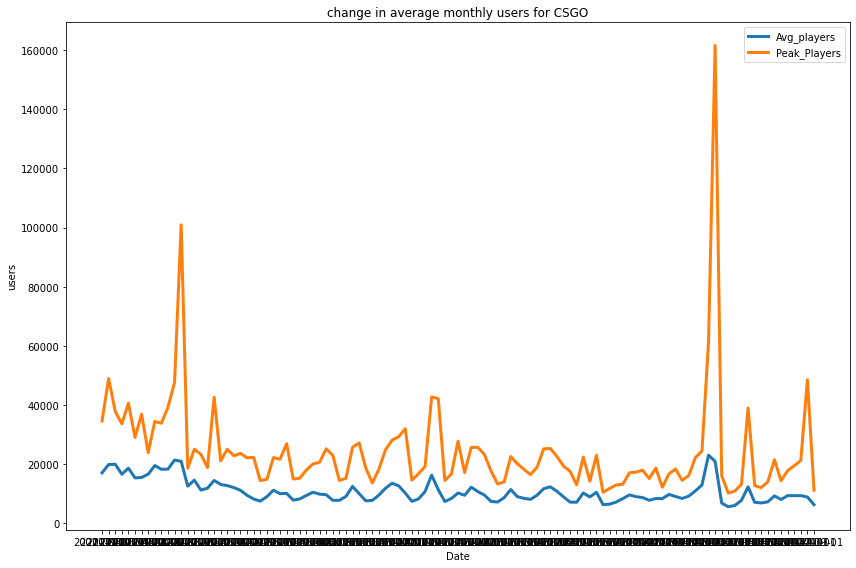

In [98]:
# Create figure

fig = plt.figure(figsize=(12, 8))


# Plot time series

plt.plot(CSGO1.Date, CSGO1.Avg_players, label='Avg_players', linewidth=3)
plt.plot(CSGO1.Date, CSGO1.Peak_Players, label='Peak_Players', linewidth=3)

# Add title and labels

plt.title('change in average monthly users for CSGO')
plt.xlabel('Date')
plt.ylabel('users')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

In [101]:
CSGO2 = Monthly_data_cleaned_joined[Monthly_data_cleaned_joined.APP == '550']
CSGO2

,Percent_Gain,APP,Date,News,Binary_outcome
109,-14.13,550,2021-09-01,0,0
110,-0.46,550,2021-08-01,2,0
111,20.23,550,2021-07-01,2,1
112,-10.90,550,2021-06-01,2,0
113,21.26,550,2021-05-01,1,1
...,...,...,...,...,...
213,0.14,550,2013-01-01,20,1
214,-0.14,550,2012-12-01,4,0
215,5.25,550,2012-11-01,10,1
216,40.87,550,2012-10-01,33,1


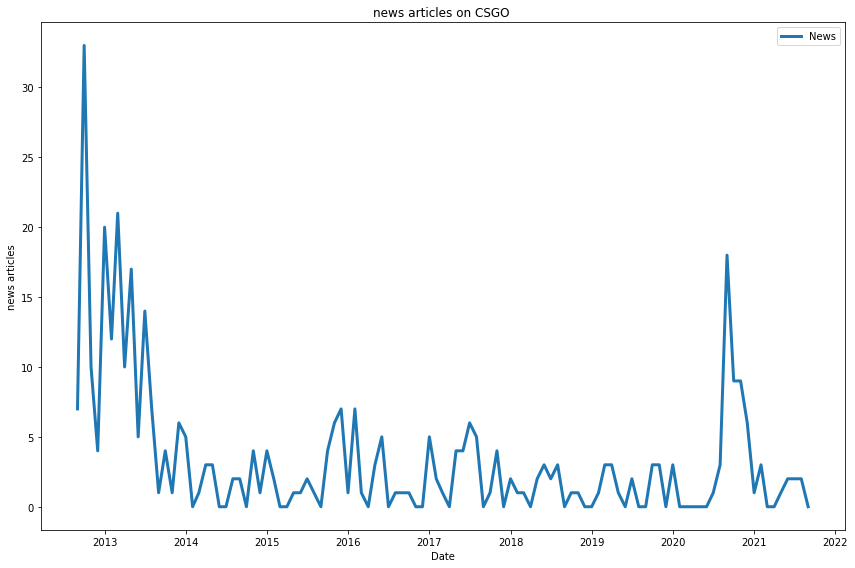

In [102]:
# Create figure

fig = plt.figure(figsize=(12, 8))


# Plot time series

plt.plot(CSGO2.Date, CSGO2.News, label='News', linewidth=3)

# Add title and labels

plt.title('news articles on CSGO ')
plt.xlabel('Date')
plt.ylabel('news articles')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

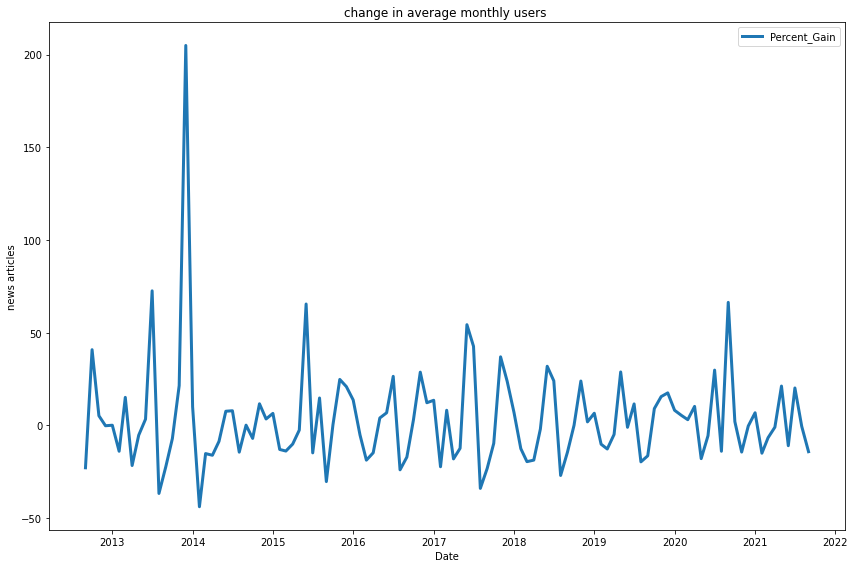

In [103]:
# Create figure

fig = plt.figure(figsize=(12, 8))


# Plot time series

plt.plot(CSGO2.Date, CSGO2.Percent_Gain, label='Percent_Gain', linewidth=3)

# Add title and labels

plt.title('change in average monthly users ')
plt.xlabel('Date')
plt.ylabel('news articles')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

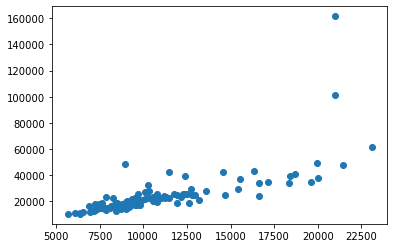

In [104]:
plt.scatter(CSGO1.Avg_players, CSGO1.Peak_Players)

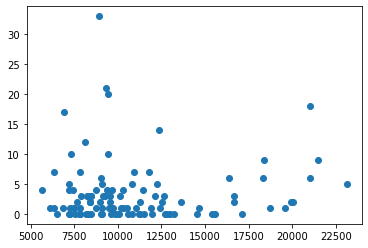

In [110]:
plt.scatter(CSGO1.Avg_players, CSGO2.News)

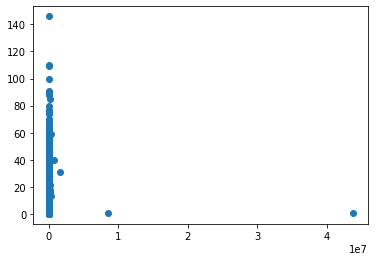

In [108]:
plt.scatter(Monthly_data_cleaned_joined.Percent_Gain, Monthly_data_cleaned_joined.News)

In [128]:
Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,News,Binary_outcome


In [127]:
Monthly_data_cleaned_joined = Monthly_data_cleaned_joined[Monthly_data_cleaned_joined.Percent_Gain > 500]
Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,News,Binary_outcome


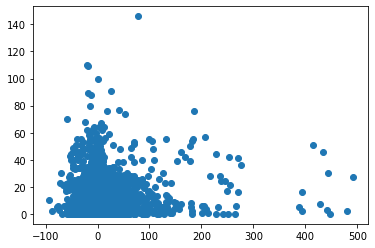

In [126]:
plt.scatter(Monthly_data_cleaned_joined.Percent_Gain, Monthly_data_cleaned_joined.News)